In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
dataHP = pd.read_csv('train.csv')
dataHP.shape
print(dataHP.columns)

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [3]:
dataset=dataHP
def getColumnTypes(dataset):
    continuas= []
    discretas = []
    categoricas = []
    for col in dataset.columns:
        if(dataset[col].dtypes=='int64' or (dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
               continuas.append(col)
            else:
               discretas.append(col)
        else: 
               categoricas.append(col) 
    return continuas, discretas, categoricas

In [4]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas) 

['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
[]
['ocean_proximity']


In [5]:
def data_faltante(dataHP):
    prop_nan_por_col = dataHP.isnull().mean() * 100 
    return prop_nan_por_col

data_faltante = data_faltante(dataHP)
print(data_faltante)

id                    0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948294
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [6]:
def drop_nan_rows(dataHP, columns):
    """Función que elimina las filas con valores faltantes en las columnas especificadas"""
    dataHP = dataHP.dropna(subset=columns)
    return dataHP
columns = ['total_bedrooms']
dataHP_clean = drop_nan_rows(dataHP, columns)
print(dataHP_clean.isnull().mean())

id                    0.0
longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64


In [7]:
dataHP.shape, dataHP_clean.shape

((14447, 11), (14310, 11))

<Axes: >

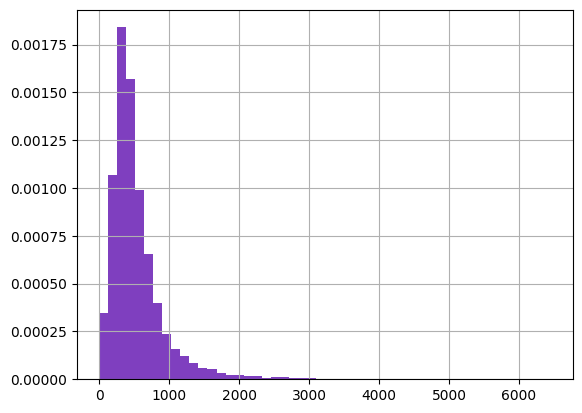

In [8]:
dataHP['total_bedrooms'].hist(bins=50,density=True,color='red',alpha=0.5)
dataHP_clean['total_bedrooms'].hist(bins=50,density=True,color='blue',alpha=0.5)

In [9]:
import seaborn as sns

def plot_density(dataframe, column):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)

    colors = sns.color_palette('bright', n_colors=len(dataframe[column].unique()))

    for i, value in enumerate(dataframe[column].unique()):
        sns.kdeplot(dataframe[dataframe[column] == value]['median_house_value'], shade=True, ax=ax, label=value, color=colors[i])

    ax.set_xlabel('median_house_value')
    ax.set_ylabel('Densidad')
    ax.set_title(f'{column}')
    ax.legend()
    plt.show()

<ipython-input-9-c8d54ffa4075>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['median_house_value'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-9-c8d54ffa4075>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['median_house_value'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-9-c8d54ffa4075>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[dataframe[column] == value]['median_house_value'], shade=True, ax=ax, label=value, color=colors[i])
<ipython-input-9-c8d54ffa4075>:10: FutureWarning: 

`sh

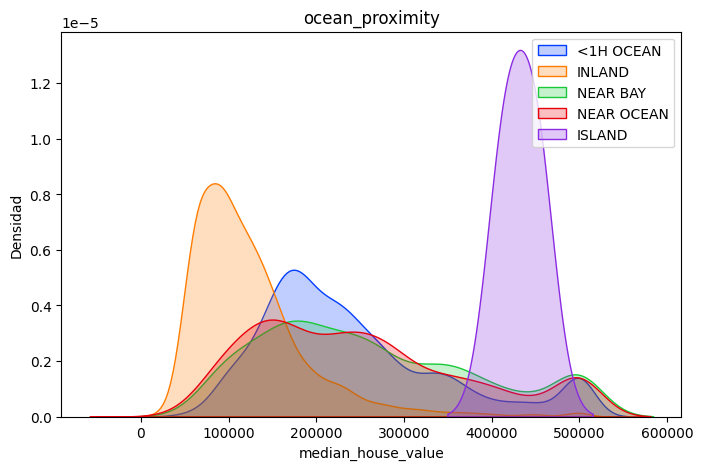

In [10]:
for col in ['ocean_proximity']:
    plot_density(dataHP, col)

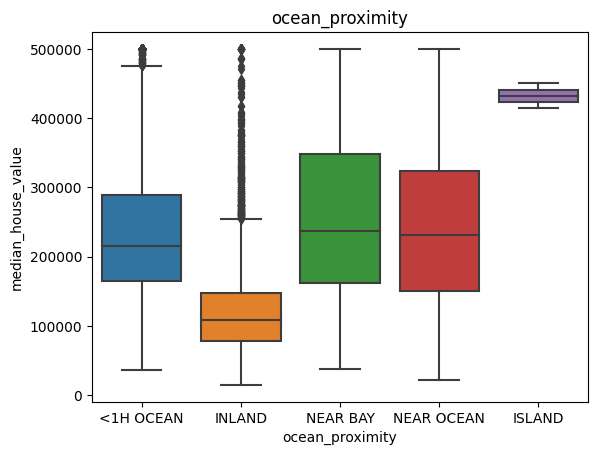

In [11]:
import seaborn as sns 

cat_cols = ['ocean_proximity']
data_cat = dataHP[cat_cols]

def plot_boxplot(dataHP, column):
    sns.boxplot(x=dataHP[column], y=dataHP['median_house_value'])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('median_house_value')
    plt.show()

for col in cat_cols:
    plot_boxplot(dataHP, col)

In [12]:
def getCategoryVars(dataHP):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames: 
        if(dataHP[col].dtype=='object'): 
            cat_colnames.append(col) 
    return cat_colnames

In [13]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['ocean_proximity']

In [15]:
cat_cols.append('median_house_value')
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

,ocean_proximity,median_house_value
0,<1H OCEAN,227500.0
1,INLAND,65800.0
2,<1H OCEAN,500001.0
3,NEAR BAY,225000.0
4,<1H OCEAN,272900.0


In [16]:
dataset_categories['ocean_proximity'].value_counts()

<1H OCEAN     6384
INLAND        4577
NEAR OCEAN    1865
NEAR BAY      1619
ISLAND           2
Name: ocean_proximity, dtype: int64

In [17]:
ocean_proximity_freq_mapper = (dataset_categories['ocean_proximity'].value_counts().sort_values(ascending=False))

In [20]:
dataset_categories['ocean_proximity_code']=dataset_categories['ocean_proximity'].map(ocean_proximity_freq_mapper)
dataset_categories[['ocean_proximity','ocean_proximity_code']]
print('ocean_proximity:')
print(dataset_categories[['ocean_proximity', 'ocean_proximity_code']]).unique

ocean_proximity:
      ocean_proximity  ocean_proximity_code
0           <1H OCEAN                  6384
1              INLAND                  4577
2           <1H OCEAN                  6384
3            NEAR BAY                  1619
4           <1H OCEAN                  6384
...               ...                   ...
14442        NEAR BAY                  1619
14443      NEAR OCEAN                  1865
14444          INLAND                  4577
14445          INLAND                  4577
14446       <1H OCEAN                  6384

[14447 rows x 2 columns]


<ipython-input-20-ef2c5aa48ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['ocean_proximity_code']=dataset_categories['ocean_proximity'].map(ocean_proximity_freq_mapper)


AttributeError: ignored

In [21]:
dataset =dataHP
col='median_house_value'
def plotDistBoxQQ(dataset,col):
    
    
    plt.figure(figsize=(20,6))

    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Boxplot")

<ipython-input-21-f32eb1ede4e6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-21-f32eb1ede4e6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-21-f32eb1ede4e6>:9: UserWarning: 

`distplot` is a deprecated function and 

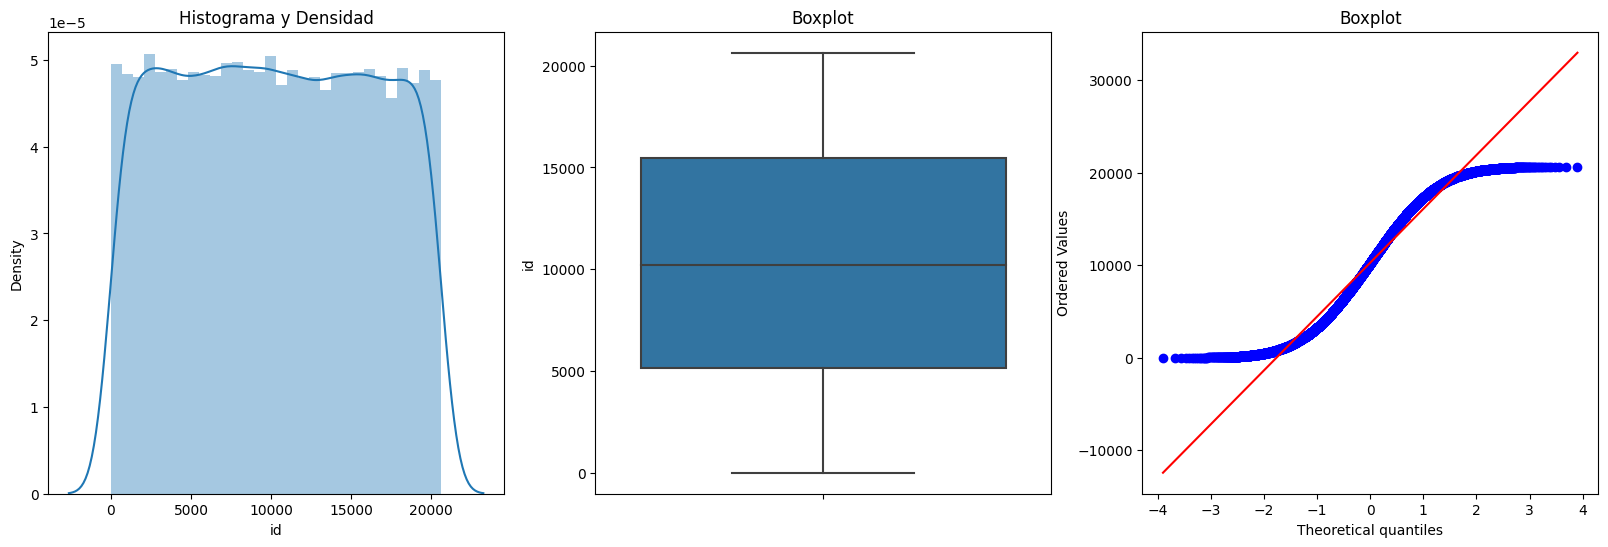

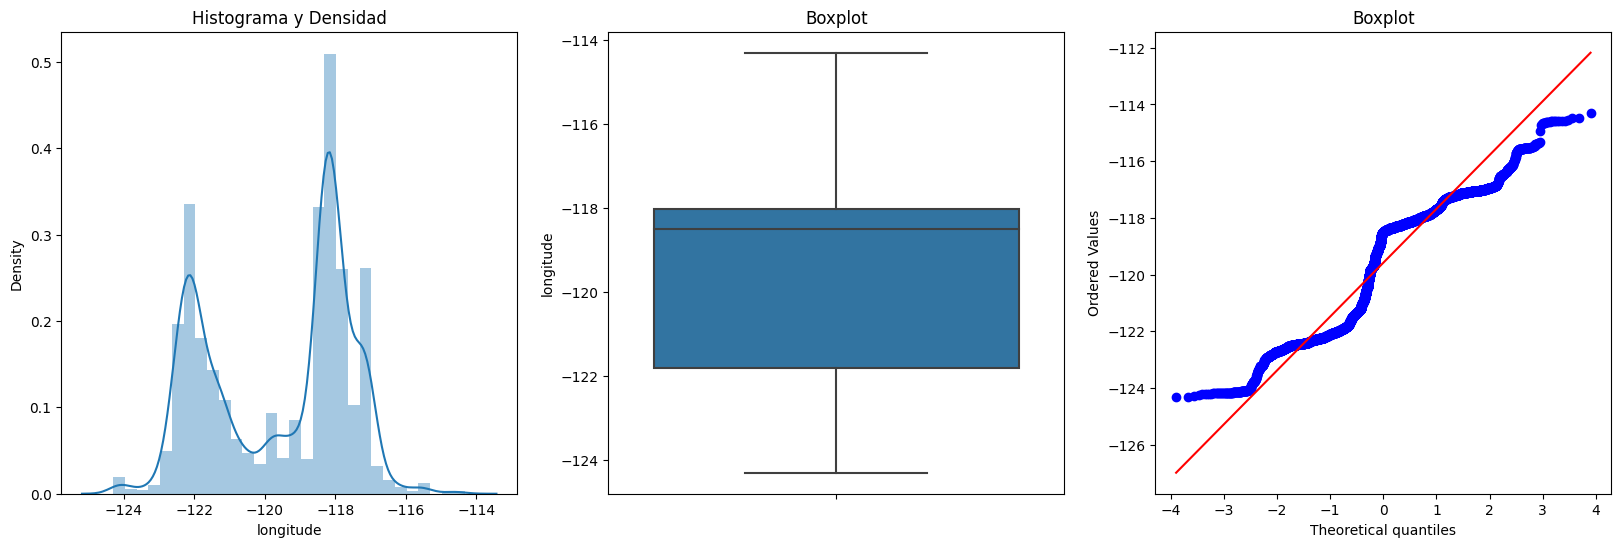

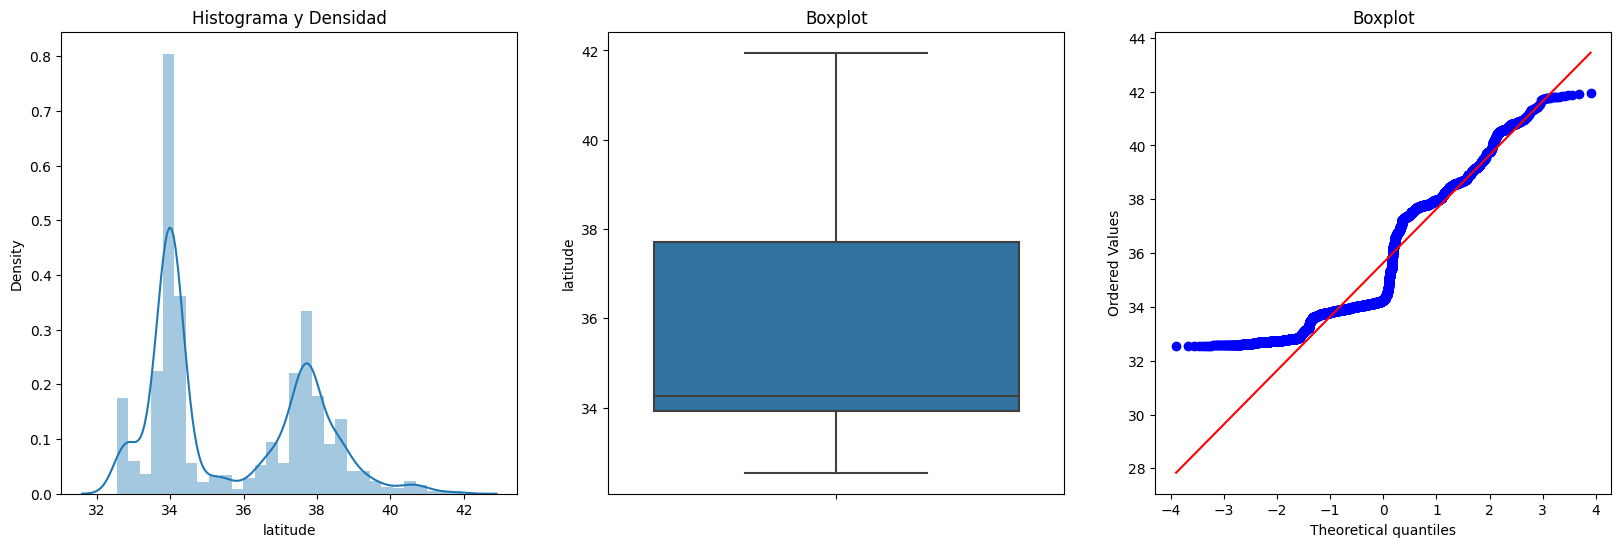

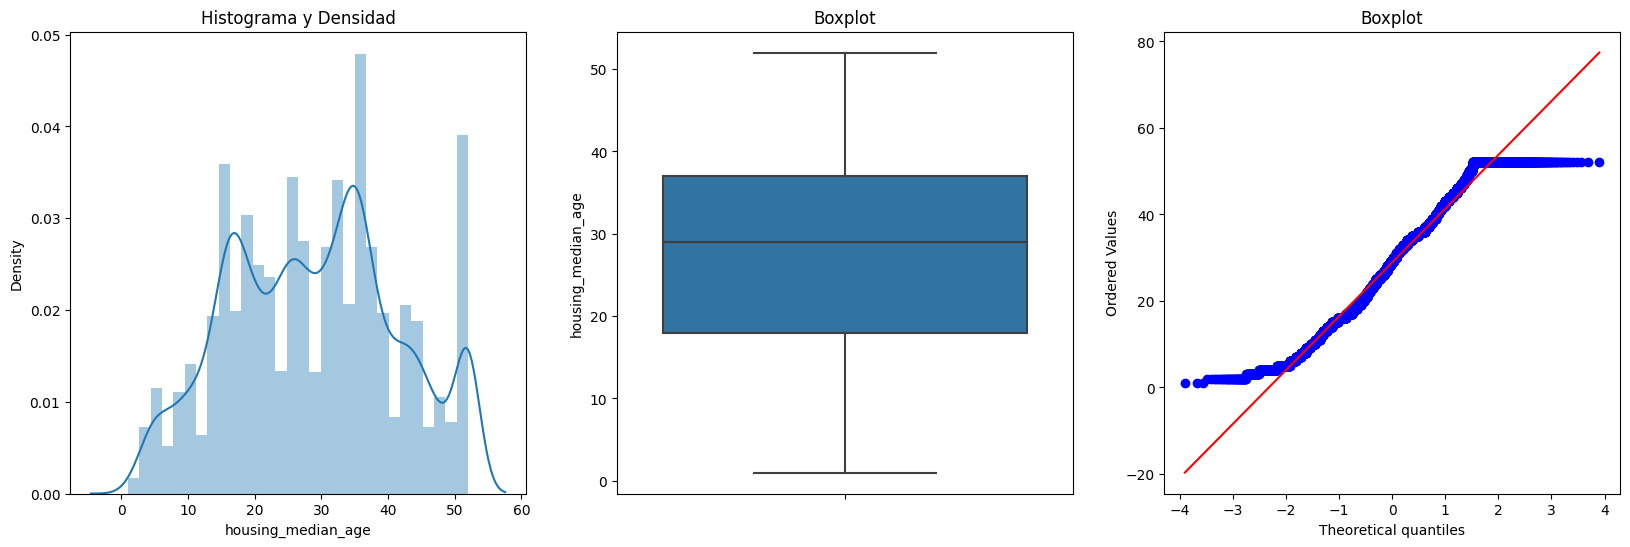

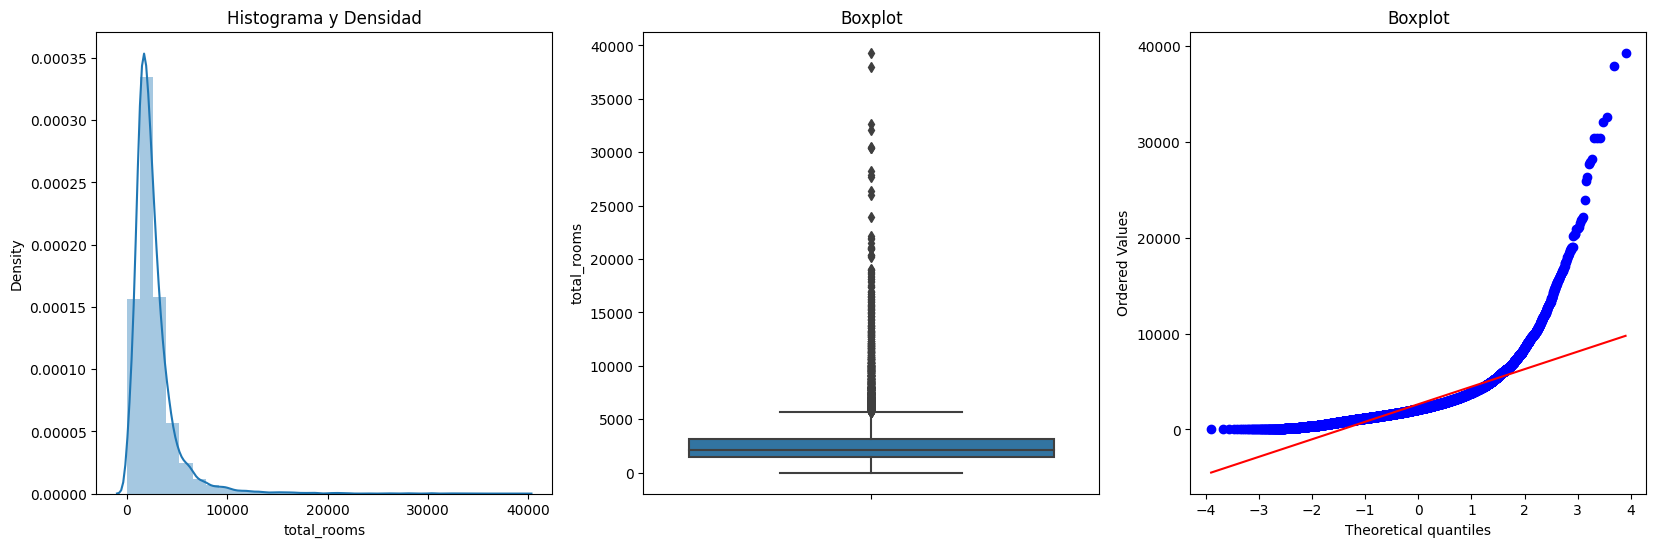

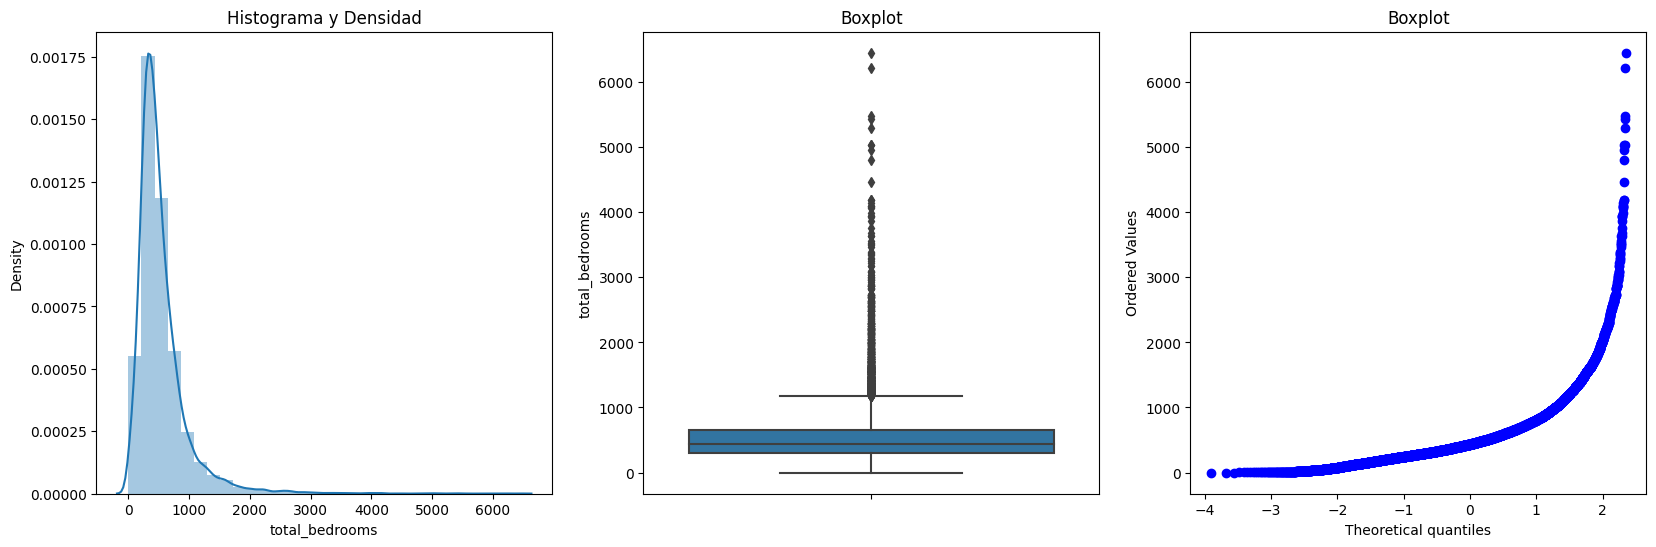

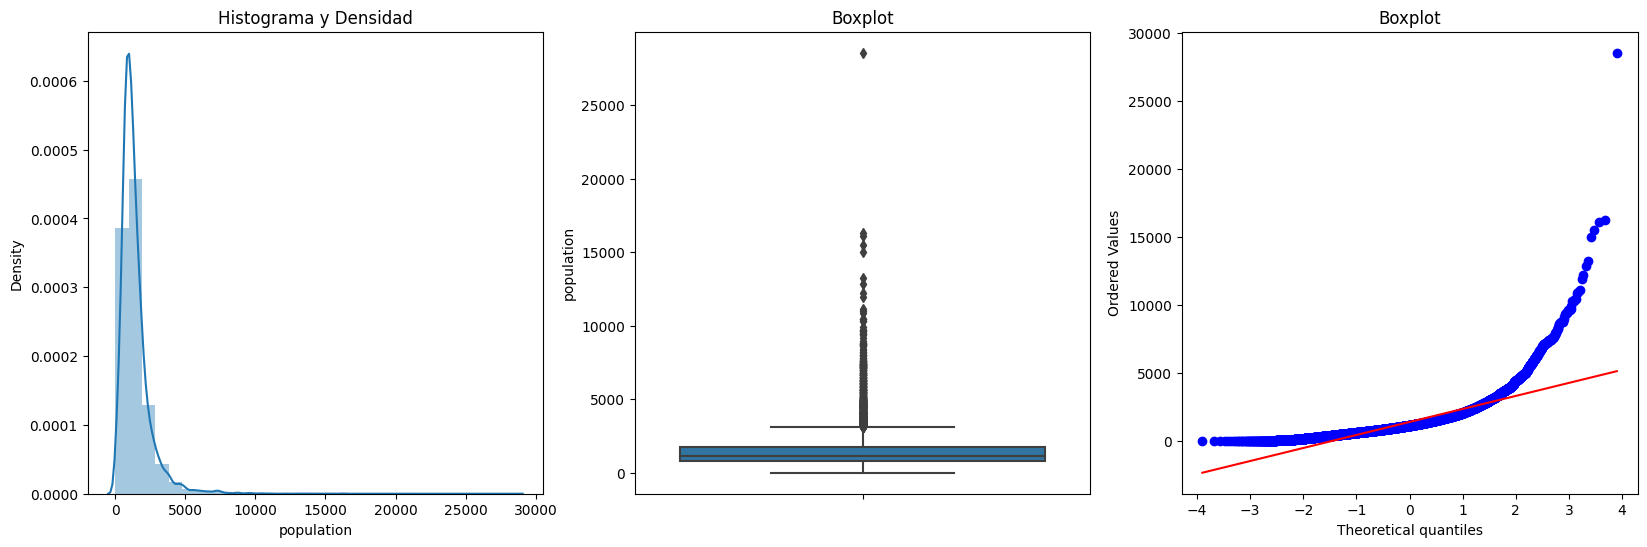

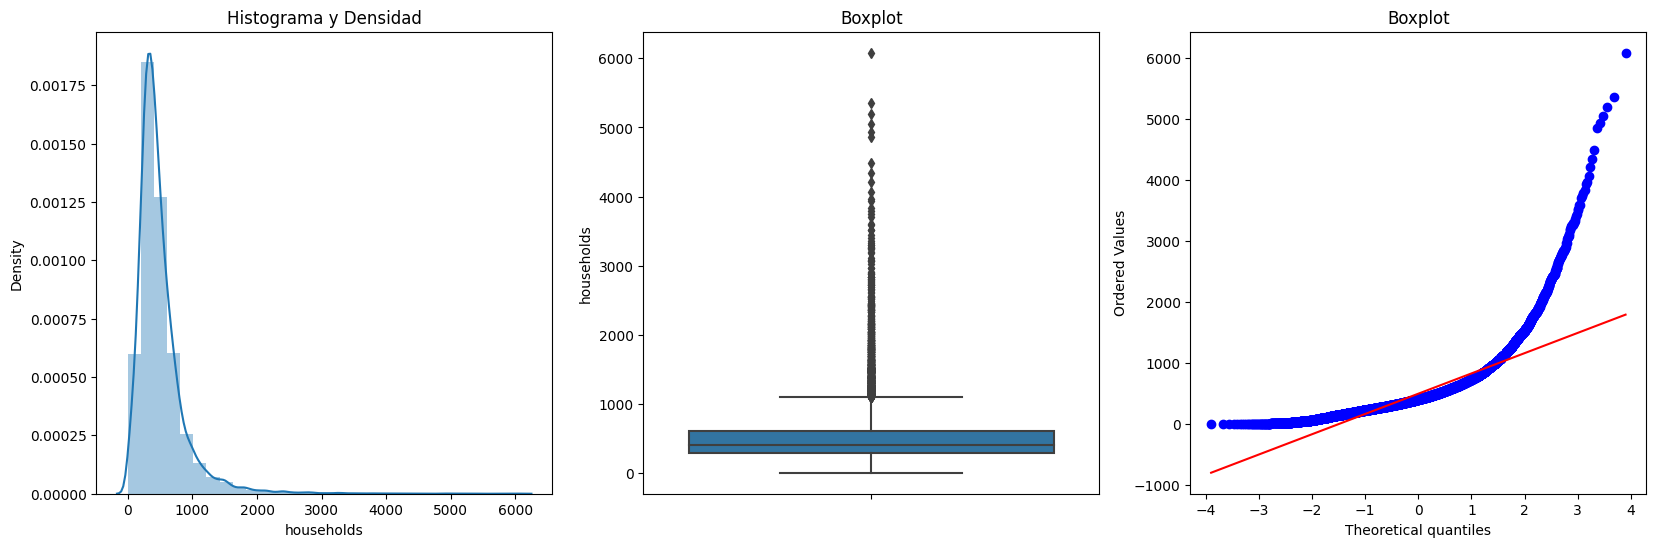

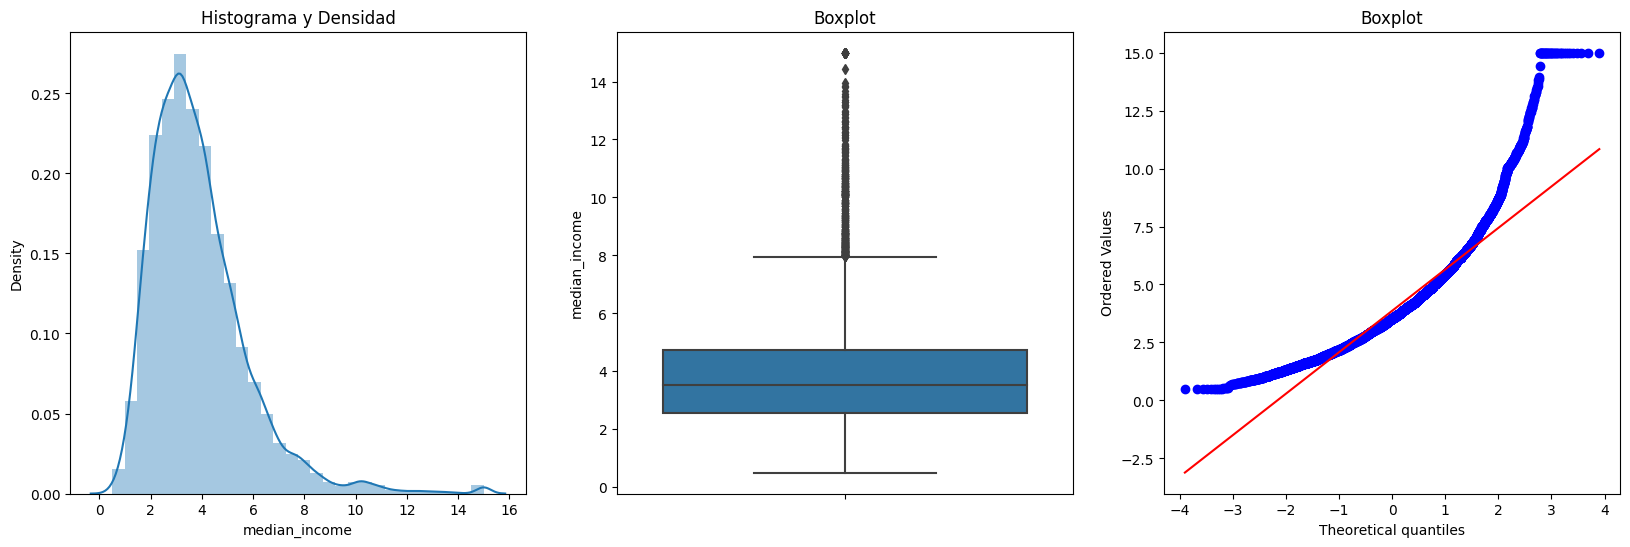

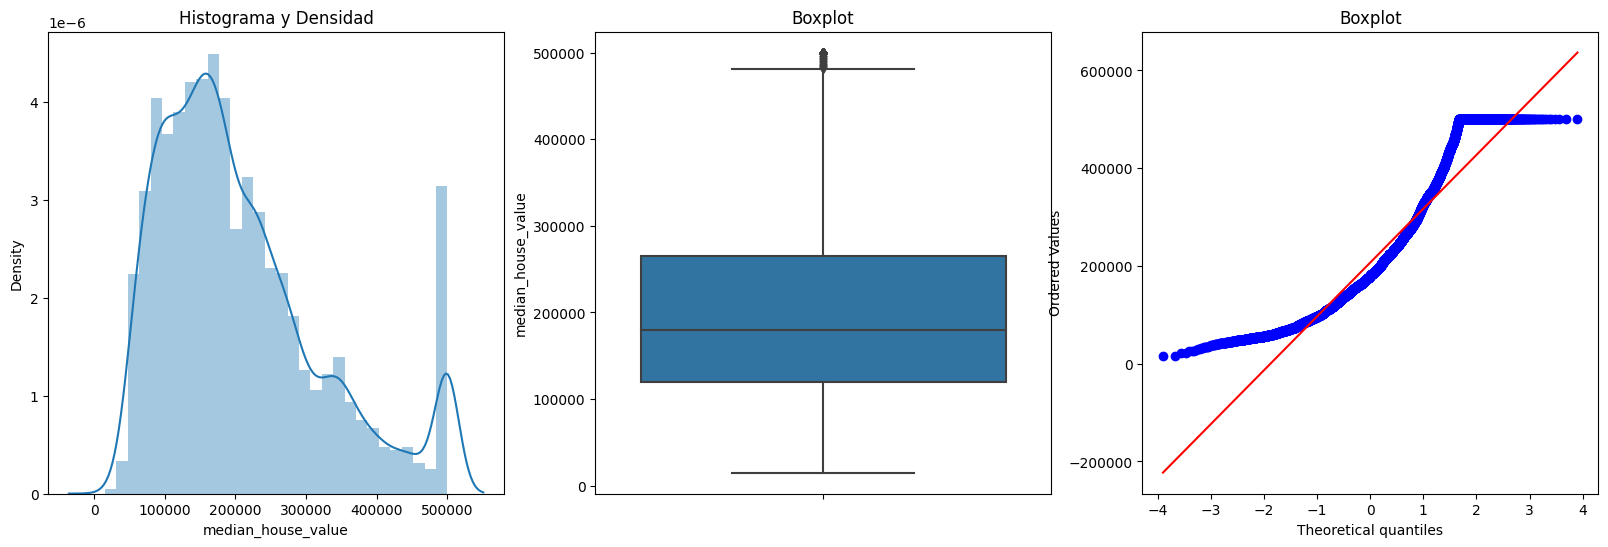

In [22]:
for col in continuas: 
    plotDistBoxQQ(dataHP,col)

In [23]:
dataset = dataHP
col = 'longitude' 
def detectOutliersLimits(dataset,col):
   
    IQR = dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (IQR*1.75)
    LS = dataset[col].quantile(0.75) + (IQR*1.75)
    
    return LI,LS

In [25]:
def cappingContinuas(dataset):
    
    continuas, _, _ = getColumnTypes(dataset)
    cols_no_neg = ['longitude']  
    for col in continuas:
        if col not in cols_no_neg:
            LI, LS = detectOutliersLimits(dataset, col)
            dataset[col] = np.where(dataset[col] > LS, LS,
                                    np.where(dataset[col] < LI, LI, dataset[col]))
            dataset[col] = np.where(dataset[col] < 0, 0, dataset[col])  
        else:
            LI, LS = detectOutliersLimits(dataset, col)
            dataset[col] = np.where(dataset[col] > LS, LS,
                                    np.where(dataset[col] < LI, LI, dataset[col]))
    return dataset

In [26]:
dataHP_capped = cappingContinuas(dataHP)

<ipython-input-21-f32eb1ede4e6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-21-f32eb1ede4e6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-21-f32eb1ede4e6>:9: UserWarning: 

`distplot` is a deprecated function and 

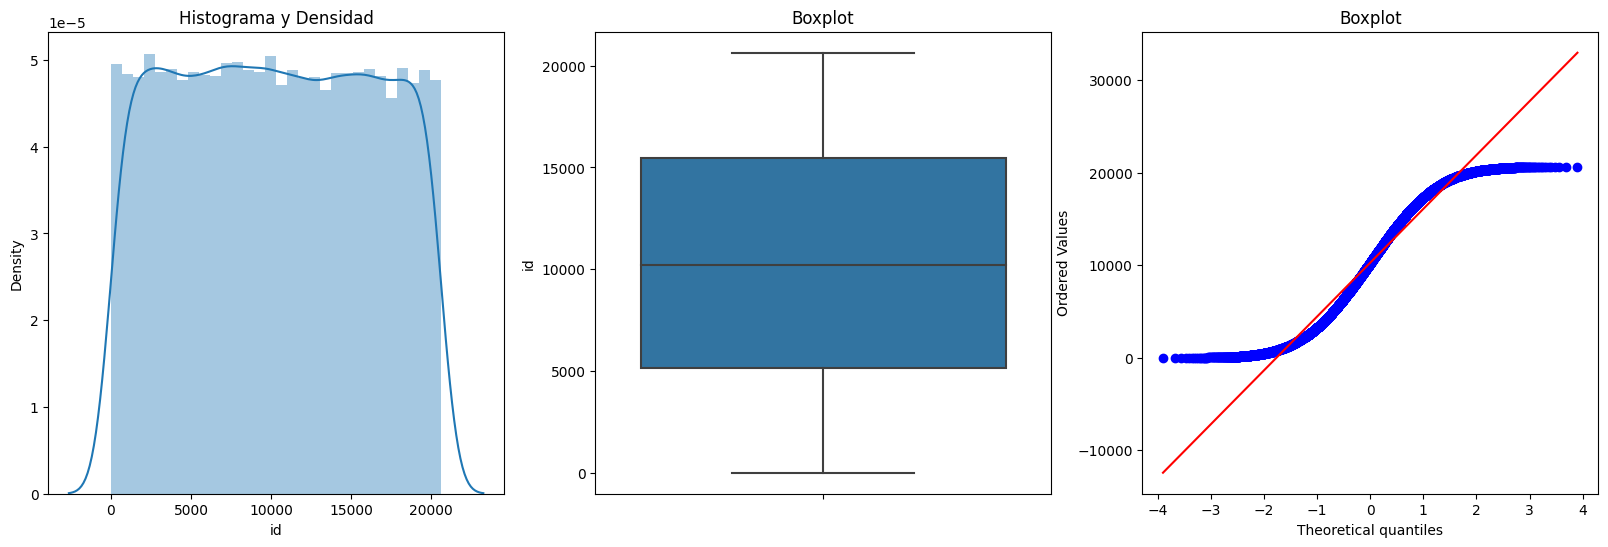

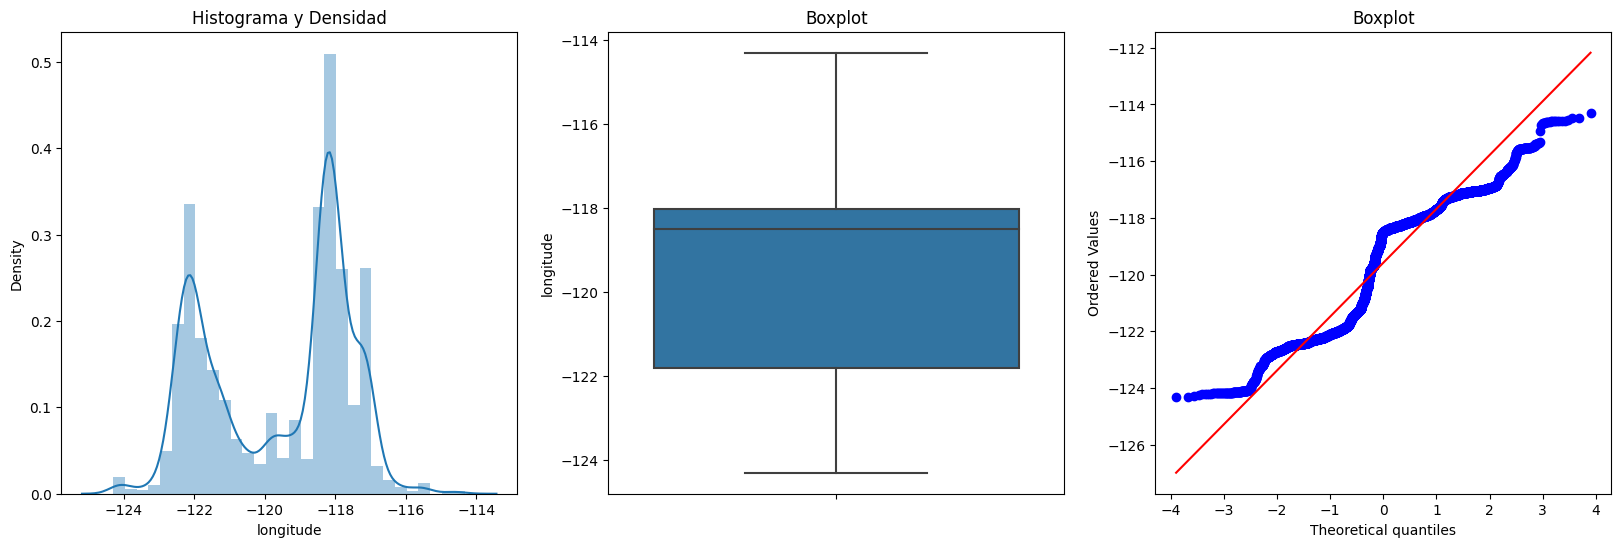

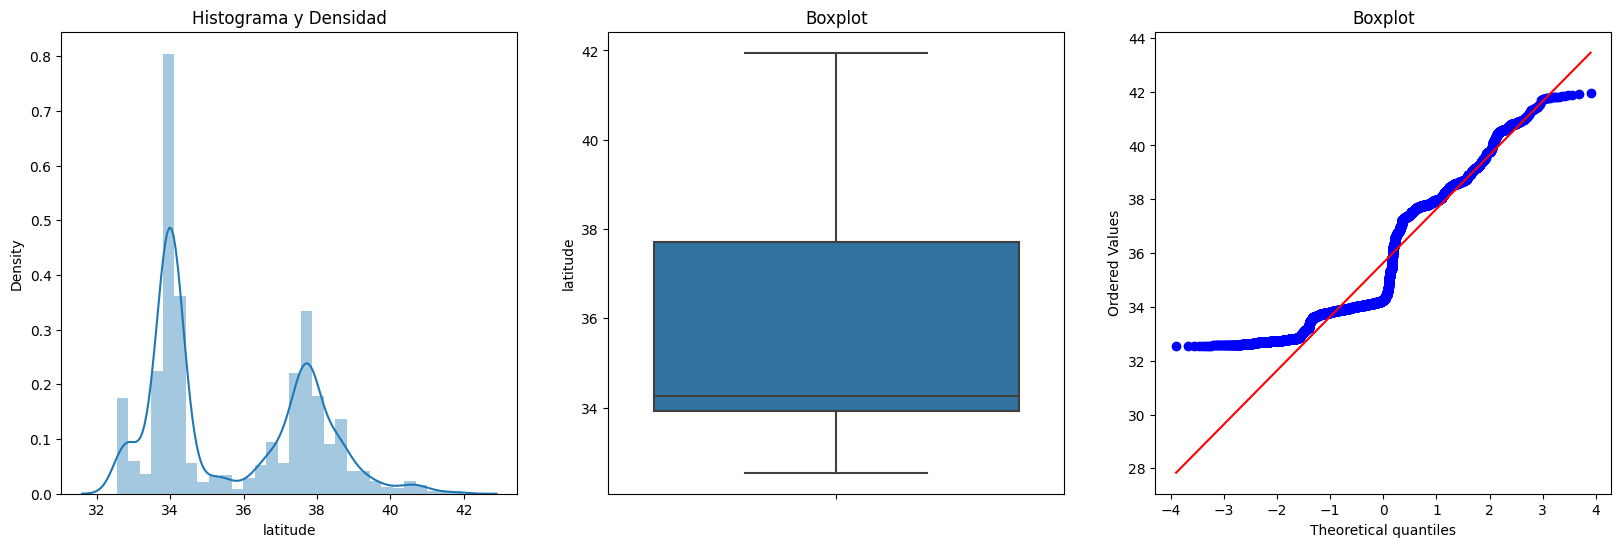

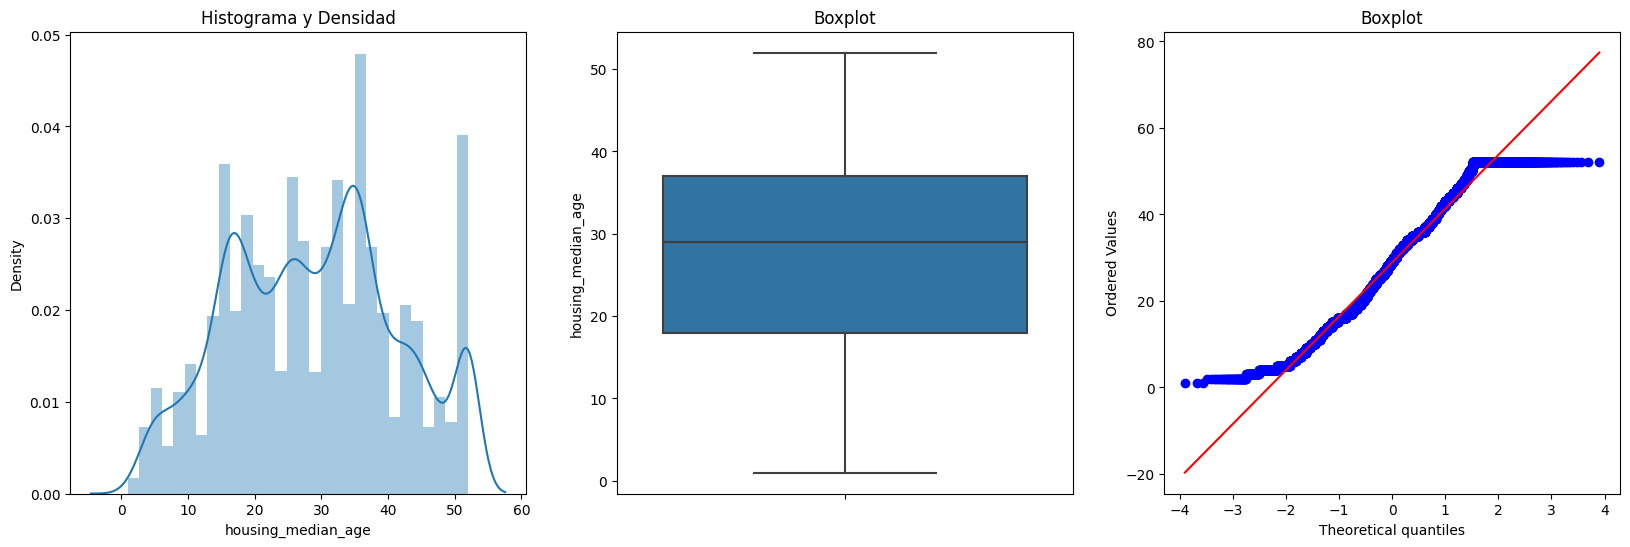

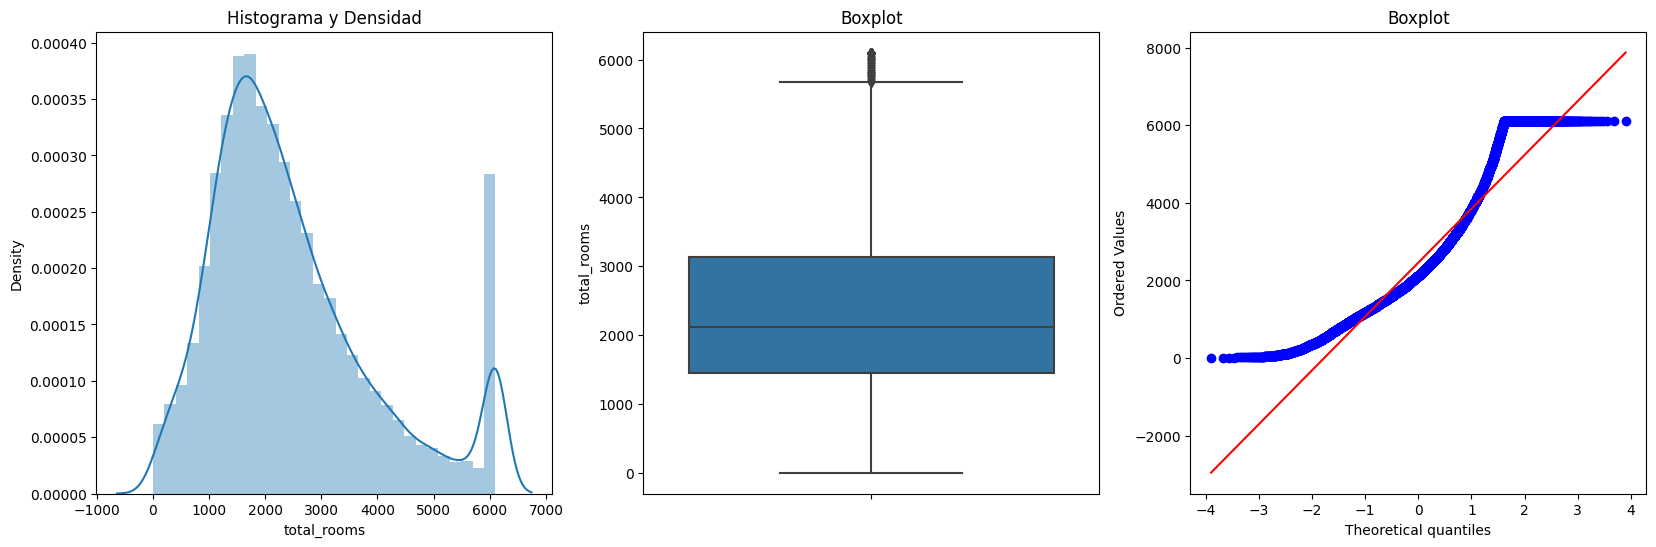

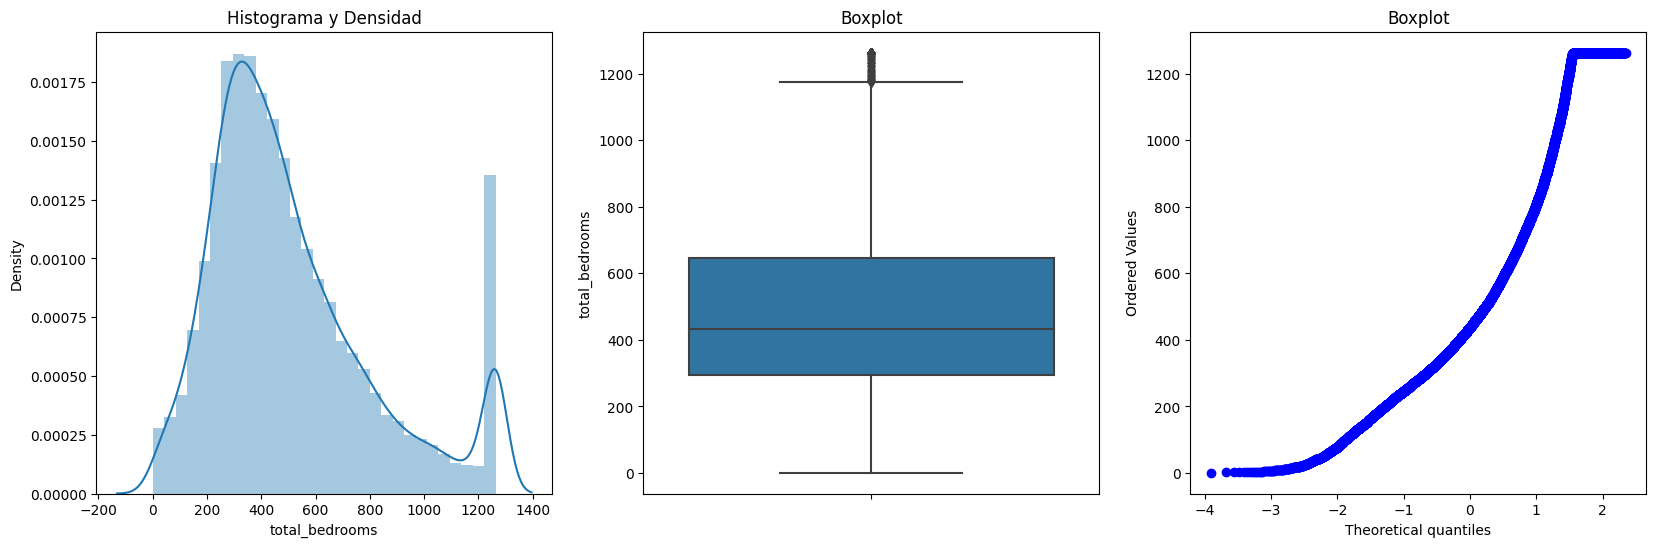

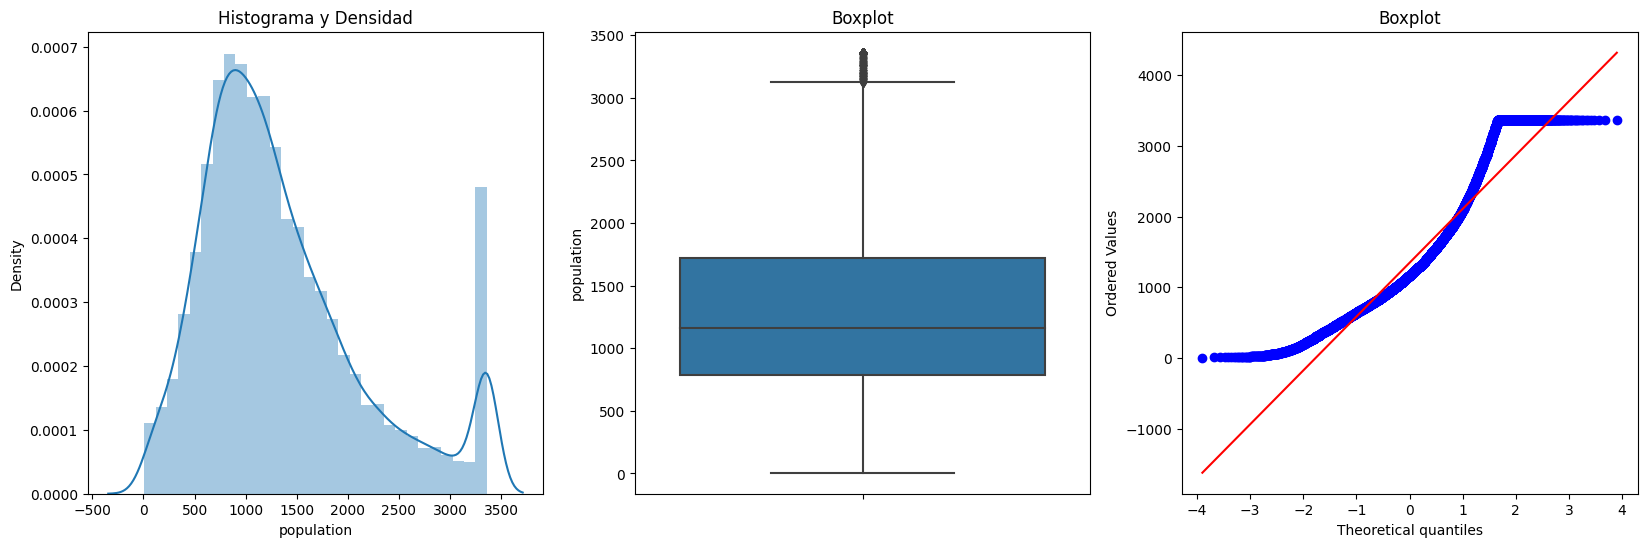

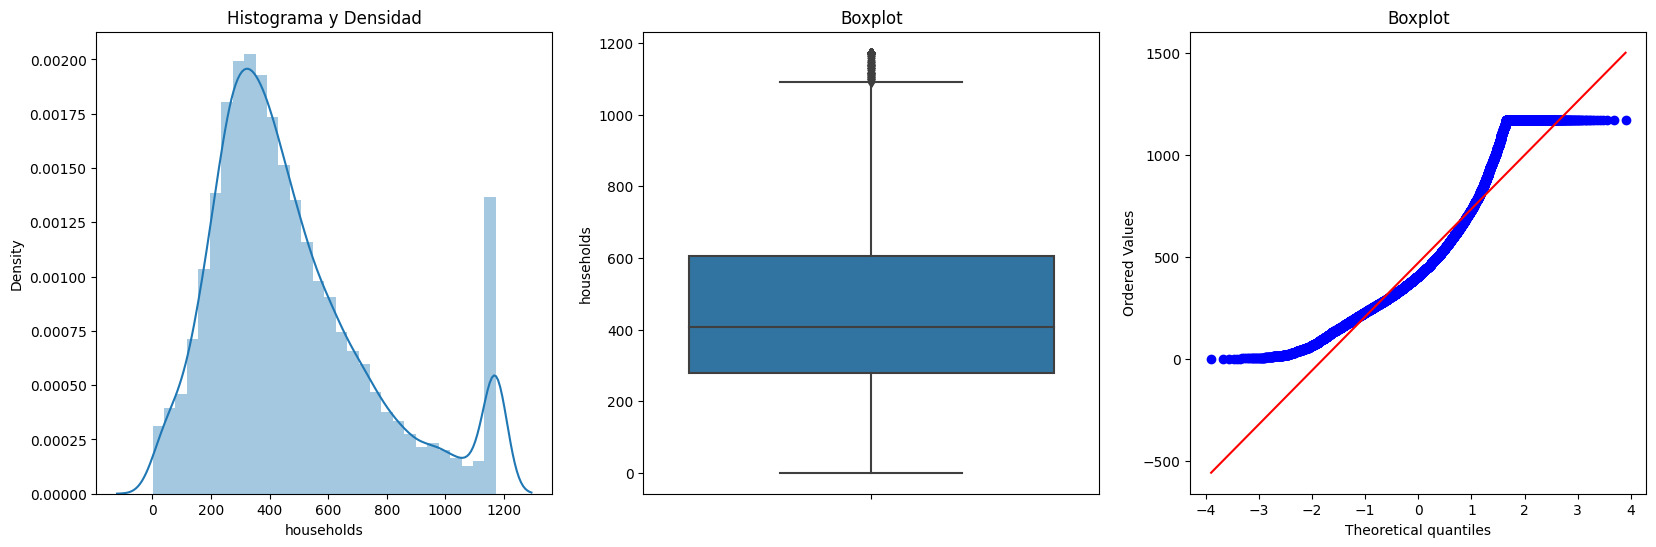

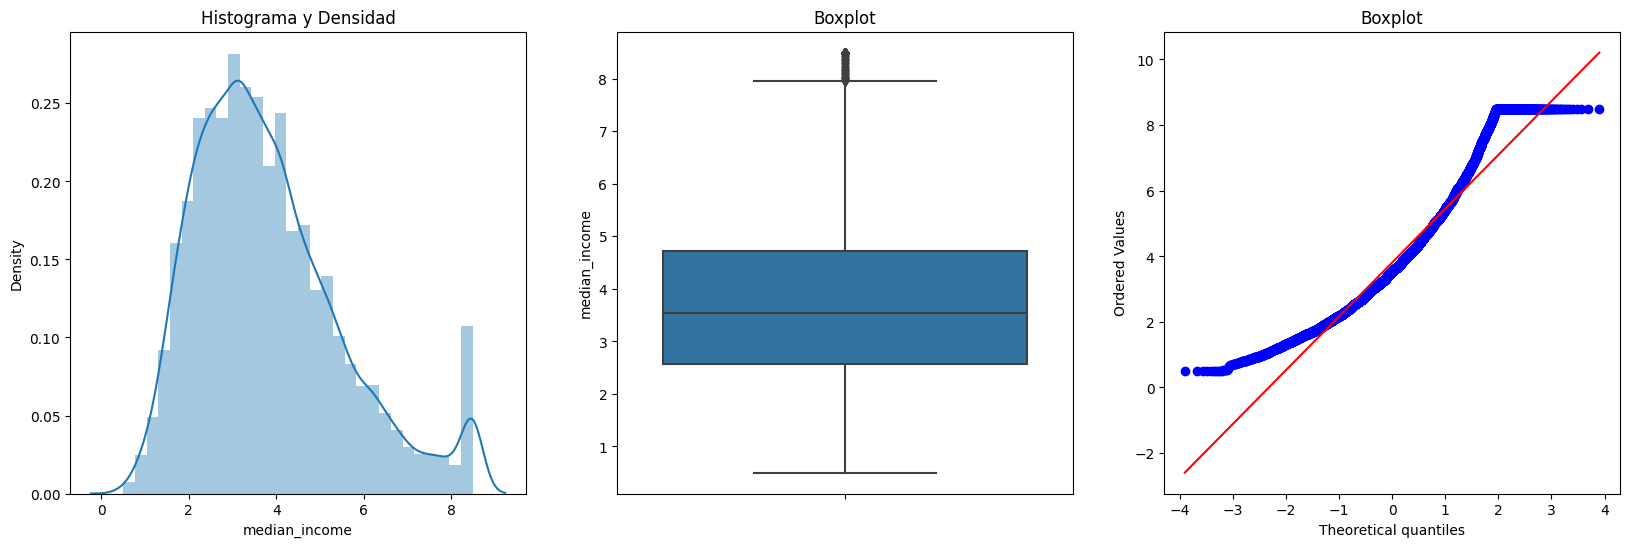

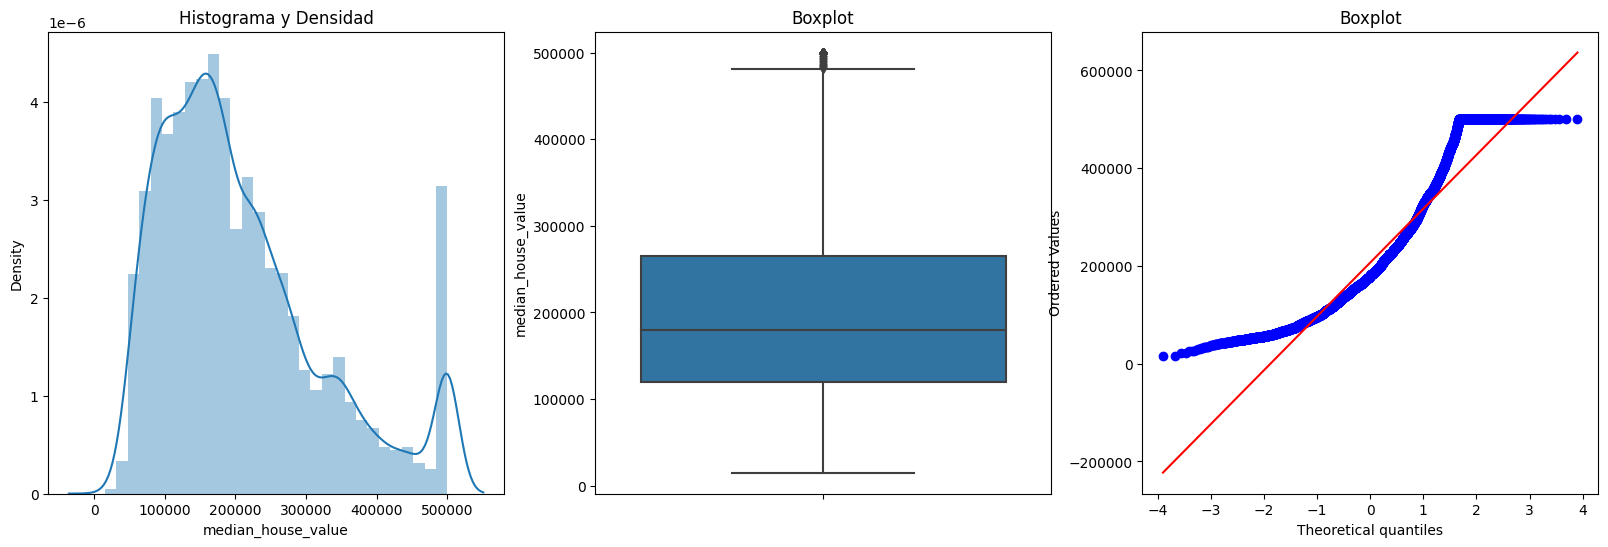

In [27]:
for col in continuas: 
    plotDistBoxQQ(dataHP,col)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
dataHP_temp=dataHP.copy()[continuas]

In [31]:
scaler = StandardScaler()
scaler.fit(dataHP_temp)

dataHP_scaled = scaler.transform(dataHP_temp)
dataHP_scaled = pd.DataFrame(dataHP_scaled,columns=dataHP_temp.columns)

In [32]:
round(dataHP_scaled.describe(),2)

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14447.00,14447.00,14447.00,14447.00,14447.00,14310.00,14447.00,14447.00,14447.00,14447.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.72,-2.36,-1.45,-2.21,-1.69,-1.69,-1.69,-1.71,-1.96,-1.66
25%,-0.86,-1.11,-0.80,-0.86,-0.70,-0.71,-0.71,-0.70,-0.74,-0.76
50%,-0.01,0.54,-0.65,0.01,-0.23,-0.25,-0.23,-0.24,-0.16,-0.24
75%,0.87,0.78,0.97,0.65,0.47,0.47,0.47,0.48,0.54,0.50
max,1.74,2.63,2.95,1.84,2.51,2.53,2.53,2.54,2.78,2.54


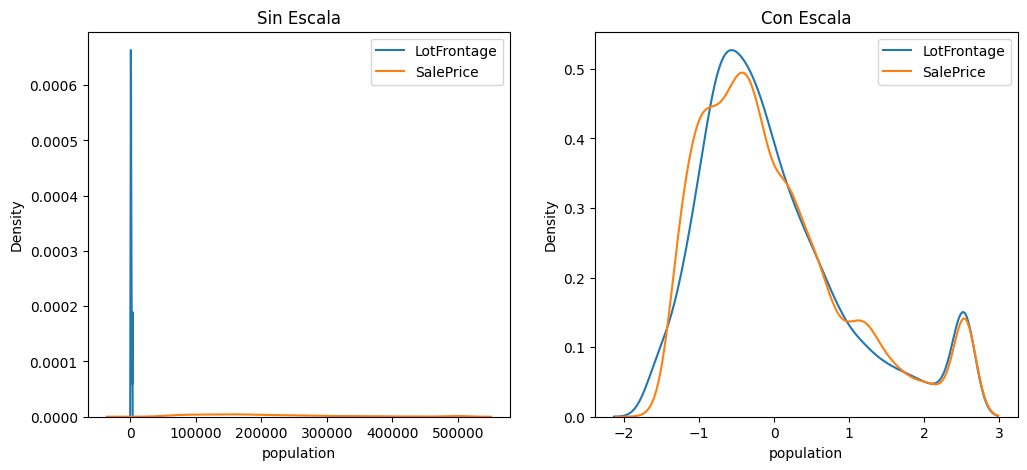

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Sin Escala")
sns.kdeplot(dataHP['population'],ax=ax1,label="LotFrontage")
sns.kdeplot(dataHP['median_house_value'],ax=ax1,label="SalePrice")

ax2.set_title("Con Escala")
sns.kdeplot(dataHP_scaled['population'],ax=ax2,label="LotFrontage")
sns.kdeplot(dataHP_scaled['median_house_value'],ax=ax2,label="SalePrice")

ax1.legend()
ax2.legend()

plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    dataHP.drop(['id', 'median_house_value'], axis=1),
    dataHP['median_house_value'],
    test_size=0.3,
    random_state=2022)

In [49]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 18.7 MB/s eta 0:00:00


In [52]:
pip install mypreprocessors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mypreprocessors (from versions: none)
ERROR: No matching distribution found for mypreprocessors


In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

from feature_engine.imputation import AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures
from feature_engine.wrappers import SklearnTransformerWrapper

import joblib

In [56]:
CATEGORICAL_VARS = ['ocean_proximity']

FEATURES = [
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity'
]

X_train = X_train[FEATURES]

y_train = np.log(y_train)
y_test = np.log(y_test)

housePrice_pipeline_v08062023 = Pipeline([
    
    ('rare_label_encoder',
        RareLabelEncoder(n_categories=1, tol=0.01, variables=CATEGORICAL_VARS)
    ),
    ('categorical_encoder',
        OrdinalEncoder(encoding_method='ordered', variables=CATEGORICAL_VARS)
    ),
    
    ('scaler',
        MinMaxScaler()
    ),
    ('modelo_lasso', 
         Lasso(alpha=0.01, random_state=2022)
    )
])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
X_train = X_train[FEATURES]

In [58]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [61]:
X_test = X_test[FEATURES]

In [ ]:
preds = housePrice_pipeline_v08062023.predict(X_test)

In [ ]:
rmseTest = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(preds)))

In [ ]:
np.min(np.exp(y_train)), np.max(np.exp(y_train))

In [ ]:
rmseTest / (np.max(np.exp(y_train)) - np.min(np.exp(y_train)))

In [71]:
joblib.dump(housePrice_pipeline_v08062023, 'housePrice_pipeline_v08062023.pkl')

['housePrice_pipeline_v08062023.pkl']

In [70]:
joblib.dump(FEATURES, 'FEATURES.pkl')

['FEATURES.pkl']